# **Thư viện**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# **Dữ liệu**

In [67]:
df = pd.read_csv("../data/raw/EUR_VND_Exchange_Rate.csv")[::-1]
df.head()

,timestamp,open,high,low,close
2603,2015-04-02,22956.0,22956.0,22956.0,22956.0
2602,2015-04-05,22956.0,22956.0,22956.0,22956.0
2601,2015-04-06,22956.0,23060.0,22956.0,22956.0
2600,2015-04-07,23060.0,23088.0,23060.0,23060.0
2599,2015-04-08,23088.0,23088.0,22854.0,23088.0


# **`timestamp` thành index**

In [68]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.set_index('timestamp')

df.head()

,open,high,low,close
timestamp,,,,
2015-04-02,22956.0,22956.0,22956.0,22956.0
2015-04-05,22956.0,22956.0,22956.0,22956.0
2015-04-06,22956.0,23060.0,22956.0,22956.0
2015-04-07,23060.0,23088.0,23060.0,23060.0
2015-04-08,23088.0,23088.0,22854.0,23088.0


# **Trống, thiếu?**

**Trống**

In [69]:
missing_values = df.isnull().sum()
print("Số lượng giá trị trống trong mỗi cột:\n", missing_values)

Số lượng giá trị trống trong mỗi cột:
 open     0
high     0
low      0
close    0
dtype: int64


**Những ngày thiếu**

In [70]:
full_range = pd.date_range(start='2015-04-01', end='2025-04-01', freq='D')

existing_dates = df.index

missing_dates = full_range.difference(existing_dates)

if missing_dates.empty:
    print("Không có ngày nào bị thiếu trong dữ liệu.")
else:
    print("Các ngày bị thiếu trong dữ liệu:")
    print(missing_dates.strftime('%Y-%m-%d').tolist())
    print(len(missing_dates))


Các ngày bị thiếu trong dữ liệu:
['2015-04-01', '2015-04-03', '2015-04-04', '2015-04-10', '2015-04-11', '2015-04-17', '2015-04-18', '2015-04-24', '2015-04-25', '2015-05-01', '2015-05-02', '2015-05-08', '2015-05-09', '2015-05-15', '2015-05-16', '2015-05-22', '2015-05-23', '2015-05-29', '2015-05-30', '2015-06-05', '2015-06-06', '2015-06-12', '2015-06-13', '2015-06-19', '2015-06-20', '2015-06-26', '2015-06-27', '2015-07-03', '2015-07-04', '2015-07-10', '2015-07-11', '2015-07-17', '2015-07-18', '2015-07-24', '2015-07-25', '2015-07-31', '2015-08-01', '2015-08-07', '2015-08-08', '2015-08-14', '2015-08-15', '2015-08-21', '2015-08-22', '2015-08-28', '2015-08-29', '2015-09-04', '2015-09-05', '2015-09-11', '2015-09-12', '2015-09-18', '2015-09-19', '2015-09-25', '2015-09-26', '2015-10-02', '2015-10-03', '2015-10-09', '2015-10-10', '2015-10-16', '2015-10-17', '2015-10-23', '2015-10-24', '2015-10-30', '2015-10-31', '2015-11-06', '2015-11-07', '2015-11-13', '2015-11-14', '2015-11-20', '2015-11-21', 

Thiếu do nghỉ lễ, T7/CN

In [71]:
len(df)

2604

# **Ma trận tương quan**

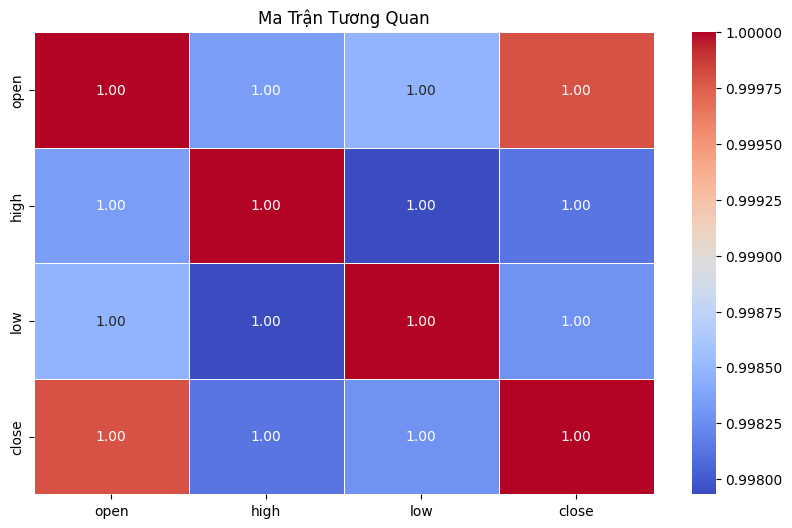

In [72]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma Trận Tương Quan")
plt.show()

=> Chỉ chọn "close"

In [73]:
data = df['close']

In [74]:
data = pd.DataFrame(data)

In [75]:
type(data)

pandas.core.frame.DataFrame

# **Chuẩn hóa dữ liệu**

In [76]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

df_scaled = pd.DataFrame(data_scaled, index=data.index, columns=['close'])

df_scaled.head()

,close
timestamp,
2015-04-02,0.815516
2015-04-05,0.815516
2015-04-06,0.815516
2015-04-07,0.819253
2015-04-08,0.820259


In [77]:
df_scaled.to_csv("../data/processed/EUR_VND_Exchange_Rate.csv")

In [78]:
# def load_and_preprocess_data(file_path, seq_length=30):
#     """Tải dữ liệu, tạo sequences và giữ lại timestamps cho train/test."""
    
#     data = pd.read_csv(file_path, parse_dates=["timestamp"])

#     timestamps = data["timestamp"].values  
#     values = data["close"].fillna(0).astype(np.float32).values

#     train_size = int(len(values) * 0.8)
#     train_values, test_values = values[:train_size], values[train_size:]
#     train_timestamps, test_timestamps = timestamps[:train_size], timestamps[train_size:]

#     def create_sequences(values, timestamps):
#         """Tạo sequences với timestamps tương ứng."""
#         if len(values) <= seq_length:
#             print("Dữ liệu quá ngắn! Không thể tạo sequences.")
#             return np.array([]), np.array([]), []

#         X, y, y_timestamps = [], [], []
#         for i in range(len(values) - seq_length):
#             X.append(values[i : i + seq_length])
#             y.append(values[i + seq_length])
#             y_timestamps.append(pd.to_datetime(timestamps[i + seq_length]).date())

#         return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32), np.array(y_timestamps)


#     X_train, y_train, time_train = create_sequences(train_values, train_timestamps)
#     X_test, y_test, time_test = create_sequences(test_values, test_timestamps)

#     return X_train, y_train, time_train, X_test, y_test, time_test